In [27]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import acquire

#from summarize import df_summary

# Acquire

In [2]:
df = acquire.get_all_data()

# Summarize df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 19 columns):
Unnamed: 0_x     913000 non-null int64
item_id          913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store_id         913000 non-null int64
Unnamed: 0_y     913000 non-null int64
level_0          913000 non-null int64
index            730400 non-null float64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
Unnamed: 0       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: float64(3), int64(10), object(6)
memory usage: 139.3+ MB


In [4]:
df.head()

,Unnamed: 0_x,item_id,sale_amount,sale_date,sale_id,store_id,Unnamed: 0_y,level_0,index,item_brand,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,store_address,store_city,store_state,store_zipcode
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,0,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,0,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,0,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,0,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [5]:
df.columns

Index(['Unnamed: 0_x', 'item_id', 'sale_amount', 'sale_date', 'sale_id',
       'store_id', 'Unnamed: 0_y', 'level_0', 'index', 'item_brand',
       'item_name', 'item_price', 'item_upc12', 'item_upc14', 'Unnamed: 0',
       'store_address', 'store_city', 'store_state', 'store_zipcode'],
      dtype='object')

# Prepare df

## Drop unnecessary columns

In [6]:
df = df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'level_0', 'index', 'Unnamed: 0'])

## Change Datatype

- Convert date column to datetime format.


In [7]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [8]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


## Set Datetime Index

- Set our datetime column, sale_date, to be our row index for our dataframe. We will want to sort the values first using sort_values(), before setting the index using set_index().

In [9]:
df = df.sort_values('sale_date').set_index('sale_date')
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


## Plot the Target Variable Over Time

In [17]:
# Quick look at what will be plotted below

df.groupby(['sale_date'])['sale_amount'].sum().reset_index()

,sale_date,sale_amount
0,2013-01-01 00:00:00+00:00,13696.0
1,2013-01-02 00:00:00+00:00,13678.0
2,2013-01-03 00:00:00+00:00,14488.0
3,2013-01-04 00:00:00+00:00,15677.0
4,2013-01-05 00:00:00+00:00,16237.0
5,2013-01-06 00:00:00+00:00,17291.0
6,2013-01-07 00:00:00+00:00,11769.0
7,2013-01-08 00:00:00+00:00,13560.0
8,2013-01-09 00:00:00+00:00,13878.0
9,2013-01-10 00:00:00+00:00,14642.0


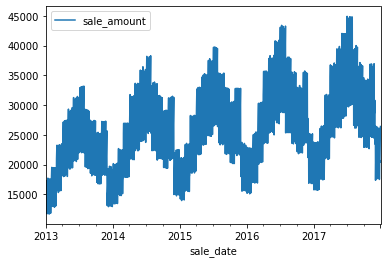

In [13]:
by_date = df.groupby(['sale_date'])['sale_amount'].sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount')

plt.show()

## Explore Our Dates

- There are 1826 days beginning with 2013-01-01 and ending with 2017-12-31.

- There are no gaps in data

In [18]:
# find count of distinct values

df.index.nunique()

1826

In [20]:
# find earliest date

df.index.min()

Timestamp('2013-01-01 00:00:00+0000', tz='UTC')

In [21]:
# find most recent date

df.index.max()

Timestamp('2017-12-31 00:00:00+0000', tz='UTC')

### Are there any missing dates?

In [22]:
# explore manually using max(), min(), and timedelta(days=1)

df.index.max() - df.index.min() + timedelta(days=1)

Timedelta('1826 days 00:00:00')

In [24]:
# explore using timedelta(df.index.nunique())

timedelta(df.index.nunique())

datetime.timedelta(days=1826)

## Explore Our Store Data

- There are 10 different stores, and each store has the same number, 91,300, item sales.

In [25]:
# number of unique store ids

df.store_id.nunique()

10

In [26]:
# number of observations per store

df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

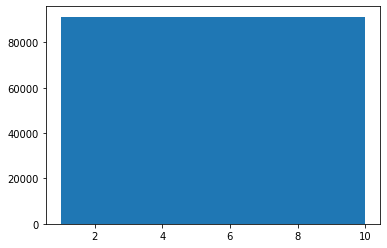

In [28]:
# visualize any missing store_id values

plt.hist(df.store_id)
plt.show()

## Explore Our Item Sales

- There are 50 unique item_id values.

- There are 18,260 sales for each item.

In [29]:
# 50 unique item ids

df.item_id.nunique()

50

In [30]:
# number of observations per item

df.item_id.value_counts(sort=False).describe()

count       50.0
mean     18260.0
std          0.0
min      18260.0
25%      18260.0
50%      18260.0
75%      18260.0
max      18260.0
Name: item_id, dtype: float64

## Explore Stores + Items

- The first sale date for each store/item in this df is 2013-01-01.

- The last sale date for each store/item in this df is 2017-12-31.

- At least one of each item was sold at each store throughout time period.

In [33]:
# reset the index so that sale_date becomes a feature useable in an aggregate
# get the min() date

first_sale_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.min()
first_sale_per_storeitem[0:100]

store_id  item_id
1         1         2013-01-01 00:00:00+00:00
          2         2013-01-01 00:00:00+00:00
          3         2013-01-01 00:00:00+00:00
          4         2013-01-01 00:00:00+00:00
          5         2013-01-01 00:00:00+00:00
          6         2013-01-01 00:00:00+00:00
          7         2013-01-01 00:00:00+00:00
          8         2013-01-01 00:00:00+00:00
          9         2013-01-01 00:00:00+00:00
          10        2013-01-01 00:00:00+00:00
          11        2013-01-01 00:00:00+00:00
          12        2013-01-01 00:00:00+00:00
          13        2013-01-01 00:00:00+00:00
          14        2013-01-01 00:00:00+00:00
          15        2013-01-01 00:00:00+00:00
          16        2013-01-01 00:00:00+00:00
          17        2013-01-01 00:00:00+00:00
          18        2013-01-01 00:00:00+00:00
          19        2013-01-01 00:00:00+00:00
          20        2013-01-01 00:00:00+00:00
          21        2013-01-01 00:00:00+00:00
          22    

In [34]:
# get the unique dates from the first_sale_per_storeitem

first_sale_per_storeitem.unique()

<DatetimeArray>
['2013-01-01 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

In [36]:
# reset the index so that sale_date becomes a feature useable in an aggregate
# get the max() date

last_sale_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.max()
last_sale_per_storeitem[0:100]

store_id  item_id
1         1         2017-12-31 00:00:00+00:00
          2         2017-12-31 00:00:00+00:00
          3         2017-12-31 00:00:00+00:00
          4         2017-12-31 00:00:00+00:00
          5         2017-12-31 00:00:00+00:00
          6         2017-12-31 00:00:00+00:00
          7         2017-12-31 00:00:00+00:00
          8         2017-12-31 00:00:00+00:00
          9         2017-12-31 00:00:00+00:00
          10        2017-12-31 00:00:00+00:00
          11        2017-12-31 00:00:00+00:00
          12        2017-12-31 00:00:00+00:00
          13        2017-12-31 00:00:00+00:00
          14        2017-12-31 00:00:00+00:00
          15        2017-12-31 00:00:00+00:00
          16        2017-12-31 00:00:00+00:00
          17        2017-12-31 00:00:00+00:00
          18        2017-12-31 00:00:00+00:00
          19        2017-12-31 00:00:00+00:00
          20        2017-12-31 00:00:00+00:00
          21        2017-12-31 00:00:00+00:00
          22    

In [37]:
# get the unique dates from the last_sale_per_storeitem

last_sale_per_storeitem.unique()

<DatetimeArray>
['2017-12-31 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

In [38]:
# reset index to find out on how many days each item was sold at each store

days_per_storeitem = df.reset_index().groupby(['store_id','item_id']).sale_date.nunique()
days_per_storeitem[0:100]

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
          6          1826
          7          1826
          8          1826
          9          1826
          10         1826
          11         1826
          12         1826
          13         1826
          14         1826
          15         1826
          16         1826
          17         1826
          18         1826
          19         1826
          20         1826
          21         1826
          22         1826
          23         1826
          24         1826
          25         1826
          26         1826
          27         1826
          28         1826
          29         1826
          30         1826
                     ... 
2         21         1826
          22         1826
          23         1826
          24         1826
          25         1826
          26         1826
          27        

In [39]:
# did each store well at least one of every items on every day?

days_per_storeitem.unique()

array([1826])

## Prepare Dates

### Referencing Specific Dates

In [40]:
# select a single date

df.loc['2013-01-01'].head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


In [41]:
# select part of a date, year and month

df.loc['2015-05'].sample(5, random_state=0)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2015-05-05 00:00:00+00:00,32,46.0,576045,6,Barefoot,Barefoot Pinot Grigio 187,0.68,8500004528,8500004528,1015 S WW White Rd,San Antonio,TX,78220
2015-05-24 00:00:00+00:00,27,36.0,481112,4,Morton,Morton Kosher Salt Coarse,6.01,24600017008,24600017008,516 S Flores St,San Antonio,TX,78204
2015-05-24 00:00:00+00:00,36,102.0,645452,4,Deerfields Gluten Free,Rice Bran Gluten Free Dinner Rolls Plain,7.95,610358991525,610358991525,516 S Flores St,San Antonio,TX,78204
2015-05-08 00:00:00+00:00,32,38.0,577874,7,Barefoot,Barefoot Pinot Grigio 187,0.68,8500004528,8500004528,12018 Perrin Beitel Rd,San Antonio,TX,78217
2015-05-01 00:00:00+00:00,18,73.0,322227,7,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,12018 Perrin Beitel Rd,San Antonio,TX,78217


In [42]:
# select a range of dates

df.loc['2013-12-29':'2014-01-01'].head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-12-29 00:00:00+00:00,5,10.0,77055,3,Back To Nature,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-12-29 00:00:00+00:00,49,10.0,887799,7,Easy-off,Easy-off Oven Cleaner Lemon Scent,9.54,62338879772,62338879772,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-12-29 00:00:00+00:00,23,19.0,418517,10,Reese,Reese Mandarin Oranges Segments In Light Syrup,1.78,70670009658,70670009658,8503 NW Military Hwy,San Antonio,TX,78231
2013-12-29 00:00:00+00:00,40,23.0,712503,1,Amys,Amys Light & Lean Spaghetti Italiano,0.60,42272008063,42272008063,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-12-29 00:00:00+00:00,28,50.0,502513,6,Usda Produce,Guava,7.52,719175900007,719175900007,1015 S WW White Rd,San Antonio,TX,78220


### Date Parts

In [43]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday_name

# Display a random sampling of 5 rows
df.sample(5, random_state=0)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,Year,Month,Weekday Name
sale_date,,,,,,,,,,,,,,,,
2014-11-03 00:00:00+00:00,39,29.0,703682,6,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,28400029254,28400029254,1015 S WW White Rd,San Antonio,TX,78220,2014,11,Monday
2016-06-15 00:00:00+00:00,7,85.0,114474,3,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,2118 Fredericksburg Rdj,San Antonio,TX,78201,2016,6,Wednesday
2015-01-02 00:00:00+00:00,9,45.0,159594,8,Van De Kamps,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015,15000 San Pedro Ave,San Antonio,TX,78232,2015,1,Friday
2014-10-08 00:00:00+00:00,8,61.0,135770,5,Lea & Perrins,Lea & Perrins Marinade In-a-bag Cracked Pepper...,1.68,51600080015,51600080015,1520 Austin Hwy,San Antonio,TX,78218,2014,10,Wednesday
2013-10-31 00:00:00+00:00,40,23.0,716096,3,Amys,Amys Light & Lean Spaghetti Italiano,0.60,42272008063,42272008063,2118 Fredericksburg Rdj,San Antonio,TX,78201,2013,10,Thursday


### Groupby() Dates to Aggregate Values

In [45]:
# group by sale_date and sum sale_amount, 
# so that each sale_date has a total sales amount.

df.groupby(['sale_date']).sale_amount.sum().head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-04 00:00:00+00:00    15677.0
2013-01-05 00:00:00+00:00    16237.0
Name: sale_amount, dtype: float64

### Resample Dates - Down-sampling

- If we change frequency such that we create more datapoints than we originally had, this is called down-sampling, and we will have NaNs to deal with.

- In this case, we can forward fill, or ffill(), to replace the NaN with the closest known data point from the past.

In [46]:
# redefine the frequency of our data

df2 = df.groupby('sale_date').sale_amount.sum().asfreq('12H')
df2.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        NaN
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        NaN
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [48]:
df2.asfreq('12H').ffill().head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

### Resample Dates - Up-sampling

- When we sample up, we create fewer data points than we originaly had.

- In these cases, we have to aggregate before we resample or we will lose the values of the intermediate days.

In [49]:
# we could also do np.min, np.mean, np.max, etc
# we are not reassigning the df here, so it is not changing

df.sale_amount.resample('2D').aggregate(np.sum).head()

sale_date
2013-01-01 00:00:00+00:00    27374.0
2013-01-03 00:00:00+00:00    30165.0
2013-01-05 00:00:00+00:00    33528.0
2013-01-07 00:00:00+00:00    25329.0
2013-01-09 00:00:00+00:00    28520.0
Freq: 2D, Name: sale_amount, dtype: float64

In [52]:
# resample at the start of each month (MS), taking the mean of each month
# we are not reassigning the df here, so it is not changing

df2.resample('MS').mean().head()

sale_date
2013-01-01 00:00:00+00:00    14674.322581
2013-02-01 00:00:00+00:00    16407.750000
2013-03-01 00:00:00+00:00    19915.548387
2013-04-01 00:00:00+00:00    22742.466667
2013-05-01 00:00:00+00:00    24620.709677
Freq: MS, Name: sale_amount, dtype: float64

In [53]:
# still the original df2 from when we down-sampled above

df2.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        NaN
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        NaN
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

## Finding Missing Values

In [57]:
# df2 is missing values bc of down-sampling

df2 = df.groupby('sale_date').sale_amount.sum().asfreq('12H')
df2.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        NaN
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        NaN
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [58]:
# fill NaNs with 0 first

df2 = df.groupby('sale_date').sale_amount.sum().asfreq('12H').fillna(0)
df2.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        0.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        0.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [59]:
# resample back to daily by taking the average value over the 2 12H timestamps for each day

df2 = df2.resample('1D').mean()
df2.head()

sale_date
2013-01-01 00:00:00+00:00    6848.0
2013-01-02 00:00:00+00:00    6839.0
2013-01-03 00:00:00+00:00    7244.0
2013-01-04 00:00:00+00:00    7838.5
2013-01-05 00:00:00+00:00    8118.5
Freq: D, Name: sale_amount, dtype: float64

In [60]:
# resample back to 12H using asfreq('12H')

df2 = df2.asfreq('12H')
df2.head()

sale_date
2013-01-01 00:00:00+00:00    6848.0
2013-01-01 12:00:00+00:00       NaN
2013-01-02 00:00:00+00:00    6839.0
2013-01-02 12:00:00+00:00       NaN
2013-01-03 00:00:00+00:00    7244.0
Freq: 12H, Name: sale_amount, dtype: float64

In [61]:
# fill missing values using forward fill method `fillna(method=ffill)` 

df2.fillna(method='ffill').head()

sale_date
2013-01-01 00:00:00+00:00    6848.0
2013-01-01 12:00:00+00:00    6848.0
2013-01-02 00:00:00+00:00    6839.0
2013-01-02 12:00:00+00:00    6839.0
2013-01-03 00:00:00+00:00    7244.0
Freq: 12H, Name: sale_amount, dtype: float64

### Put It All Together

In [62]:
df2 = df.groupby('sale_date').sale_amount.sum().asfreq('12H').fillna(0)
df2 = df2.resample('1D').mean().asfreq('12H').fillna(method='ffill')

df2.head()

sale_date
2013-01-01 00:00:00+00:00    6848.0
2013-01-01 12:00:00+00:00    6848.0
2013-01-02 00:00:00+00:00    6839.0
2013-01-02 12:00:00+00:00    6839.0
2013-01-03 00:00:00+00:00    7244.0
Freq: 12H, Name: sale_amount, dtype: float64

# Reproduce

In [63]:
# sort_value by index before setting index

#def prep_store_data(df):
    #return df.asign(sale_date=pd.to_datetime(df.sale_date)).sort_value('sale_date').set_index('sale_date')

# Exercises

- expanding on the above practice